# Credit Scoring prediction by using Trees 

Source https://github.com/gastonstat/CreditScoring

In [1]:
!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

--2024-07-12 16:43:37--  https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv
Resolving github.com (github.com)... 198.18.0.33
Connecting to github.com (github.com)|198.18.0.33|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv [following]
--2024-07-12 16:43:41--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 198.18.0.37
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|198.18.0.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0s      

2024-07-12 16:43:45 (435 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



In [2]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Подготовка данных

In [4]:
df = pd.read_csv('CreditScoring.csv')

In [5]:
df.head(10)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
5,1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
6,1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
7,1,9,5,12,27,1,1,1,35,80,0,0,200,1093
8,1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957
9,2,0,5,48,41,2,1,2,90,80,0,0,1200,1468


In [6]:
df.columns = df.columns.str.lower()
df.head(10)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
5,1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
6,1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
7,1,9,5,12,27,1,1,1,35,80,0,0,200,1093
8,1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957
9,2,0,5,48,41,2,1,2,90,80,0,0,1200,1468


Categorical variables are represented by numbers. For converting, we'll use the following map (extracted from Part1_CredScoring_Processing.R). It's code in R which we'll translate to Pandas.

levels(dd$Status) = c("good", "bad")

levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")

levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")

levels(dd$Records) = c("no_rec", "yes_rec")

levels(dd$Job) = c("fixed", "partime", "freelance", "others")

Let's convert it:

In [7]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head(10)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910
5,ok,1,2,60,36,2,1,1,75,214,3500,0,650,1645
6,ok,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
7,ok,9,5,12,27,1,1,1,35,80,0,0,200,1093
8,ok,0,2,60,32,2,1,3,90,107,15000,0,1200,1957
9,default,0,5,48,41,2,1,2,90,80,0,0,1200,1468


In [8]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [9]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [10]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [11]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [12]:
df.head(10)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
5,ok,1,owner,60,36,married,no,fixed,75,214,3500,0,650,1645
6,ok,29,owner,60,44,married,no,fixed,75,125,10000,0,1600,1800
7,ok,9,parents,12,27,single,no,fixed,35,80,0,0,200,1093
8,ok,0,owner,60,32,married,no,freelance,90,107,15000,0,1200,1957
9,default,0,parents,48,41,married,no,partime,90,80,0,0,1200,1468


После всех преобразований столюцы с категориальными переменными содержат фактические значения, а не ключи

In [13]:
# Сводная статистика по каждому столбцу:

df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Видим аномальные максимальные значения по колонкам income , assets, debt. Как оказалось, - это недостающие искусственные значения, которые так кодируются. Заменим их на NaN

In [14]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [15]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [16]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [17]:
# Считаем количество уникальных значений в переменной status
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [18]:
# Мы не знаем, удалось ли клиенту со статусом unk погасить кредит. Избавляемся от этих строк

df = df[df.status != 'unk']

## Разбиение данных на обучающую, валидационную и тестовую выборки

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [21]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [22]:
# Целевой переменной будет выступать факт невыплаты, те дефолта

y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

In [23]:
del df_train['status']
del df_val['status']

In [24]:
# Заменяем недостающие значения нулями
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

## Кодирование категориальных переменных

In [25]:
from sklearn.feature_extraction import DictVectorizer

In [26]:
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')

In [27]:
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [28]:
# Полученный список словарей можно использовать в качестве выходных данных для DictVectorizer
# В результате окажутся матрицы признаков для train и val наборов данных

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

# Decision trees

Дерево решений - это структура данных, которая кодирует ряд правил "если-то-иначе". Каждый узел содержит условие, если оно выполняется, то мы переходим на правую сторону дерева, если нет - на левую. В конце концов мы приходим к окончательному решению

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [30]:
# Проведем обучение

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Делаем предсказания на обучающем множестве

y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

np.float64(1.0)

In [32]:
# Делаем предсказания на валидационном множестве:

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.659747281489913)

Видим переобучение. Наша модель показала отличные результаты на тренировочном наборе, но зафейлилась на валидационном

In [33]:
# Меняем параметр глубины, отслеживаем метрики

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('train auc: %.3f' % auc)

train auc: 0.705
train auc: 0.669


Результат немного улучшился

## Tuning parameters

In [34]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [35]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [36]:
roc_auc_score(y_val, y_pred)

np.float64(0.7611041146981182)

In [37]:
# Тюнинг max_depth

for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.761
  10 -> 0.697
  15 -> 0.655
  20 -> 0.666
None -> 0.660


Оптимальные значения max_depth в диапазоне от 4 до 6

In [38]:
# Тюнинг min_samples_leaf 

for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (m, auc))

1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747


In [39]:
# Частично объединяем два цикла и выводим для глубины 4,5,6 метрики min_samples_leaf

for m in [4, 5, 6]:
    print('depth: %s' % m)
    
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))
    print()

depth: 4
1 -> 0.761
5 -> 0.761
10 -> 0.761
15 -> 0.764
20 -> 0.761
50 -> 0.753
100 -> 0.756
200 -> 0.747

depth: 5
1 -> 0.766
5 -> 0.768
10 -> 0.762
15 -> 0.772
20 -> 0.774
50 -> 0.768
100 -> 0.763
200 -> 0.759

depth: 6
1 -> 0.757
5 -> 0.760
10 -> 0.778
15 -> 0.786
20 -> 0.773
50 -> 0.770
100 -> 0.776
200 -> 0.768



Лучший вариант: depth=6 и min_samples_leaf=15

In [40]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_dt)

np.float64(0.7848562640769174)

Визуализируем ROC-кривую:

In [41]:
from sklearn.metrics import roc_curve

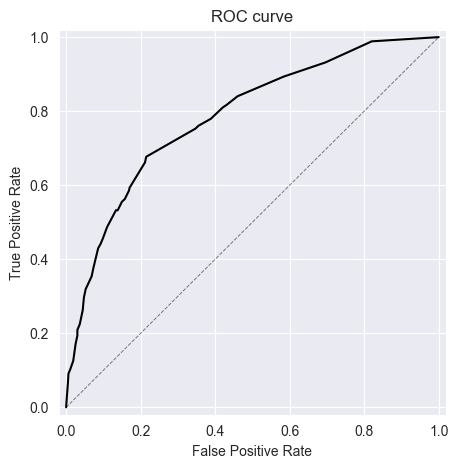

In [42]:
fpr, tpr, _ = roc_curve(y_val, y_pred_dt)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

# Random Forest

Ансамблевое обучение - способ , при котором каждое дерево обучается независимо по различающемуся подмножеству признаков. Концепция сводится к тому, что при объединении результатов нескольких моделей в одну, вероятность ошибиться будет меньше

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.786100481945218)

Ввиду рандомизации (случайного выбора подмножества объектов) , если повторить код, то результат будет варироваться.

In [45]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7842568598483932)

Для того, чтобы понять, в какой степени меняется показатель roc_auc_score, мы можем повторить 100 раз и посмотреть на среднее значение и стандартное отклонение

In [46]:
aucs = []

for i in range(100):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

auc_mean = np.mean(aucs)
auc_std = np.std(aucs)

print('%.3f +- %.3f' % (auc_mean, auc_std))
print('%.3f -- %.3f' % (auc_mean - auc_std, auc_mean + auc_std))
       

0.785 +- 0.010
0.775 -- 0.794



Чтобы результаты были согласованными, нужно присвоить значение параметру random_state

In [47]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7811145285897654)

Перебираем значения e_estimators и оцениваем AUC:

In [48]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.781
20 -> 0.801
30 -> 0.813
40 -> 0.816
50 -> 0.817
60 -> 0.818
70 -> 0.820
80 -> 0.819
90 -> 0.821
100 -> 0.820
110 -> 0.820
120 -> 0.821
130 -> 0.822
140 -> 0.822
150 -> 0.821
160 -> 0.820
170 -> 0.819
180 -> 0.819
190 -> 0.820
200 -> 0.820


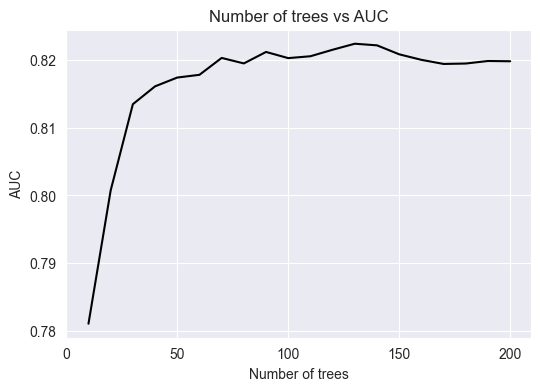

In [49]:
# Визуализируем

plt.figure(figsize=(6,4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

Тюнингуем параметр e_estimators при глуюине 5, 10, 20 :

In [50]:
all_aucs = {}

for depth in [5, 10 ,20]:
    print('depth: %s' % depth)
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth= depth, random_state=3)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
            
    all_aucs[depth] = aucs
    print()

depth: 5
10 -> 0.789
20 -> 0.794
30 -> 0.802
40 -> 0.802
50 -> 0.806
60 -> 0.805
70 -> 0.807
80 -> 0.806
90 -> 0.807
100 -> 0.805
110 -> 0.805
120 -> 0.807
130 -> 0.807
140 -> 0.806
150 -> 0.806
160 -> 0.807
170 -> 0.807
180 -> 0.807
190 -> 0.807
200 -> 0.807

depth: 10
10 -> 0.796
20 -> 0.817
30 -> 0.818
40 -> 0.822
50 -> 0.821
60 -> 0.822
70 -> 0.823
80 -> 0.821
90 -> 0.821
100 -> 0.821
110 -> 0.823
120 -> 0.824
130 -> 0.823
140 -> 0.823
150 -> 0.822
160 -> 0.822
170 -> 0.822
180 -> 0.823
190 -> 0.823
200 -> 0.824

depth: 20
10 -> 0.790
20 -> 0.800
30 -> 0.811
40 -> 0.816
50 -> 0.817
60 -> 0.818
70 -> 0.819
80 -> 0.816
90 -> 0.817
100 -> 0.817
110 -> 0.817
120 -> 0.818
130 -> 0.819
140 -> 0.818
150 -> 0.819
160 -> 0.818
170 -> 0.818
180 -> 0.819
190 -> 0.820
200 -> 0.820



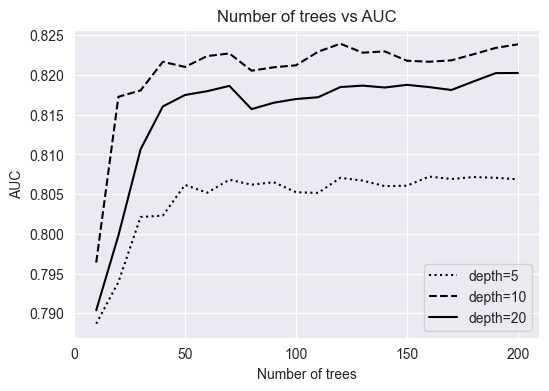

In [51]:
# Отрисовываем:

plt.figure(figsize=(6,4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')

plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.show()

Тюнингуем параметр min_samples_leaf:

In [52]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=3)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.812
30 -> 0.828
50 -> 0.828
70 -> 0.824
90 -> 0.823
110 -> 0.823
130 -> 0.824
150 -> 0.823
170 -> 0.823
190 -> 0.824

min_samples_leaf: 5
10 -> 0.812
30 -> 0.821
50 -> 0.824
70 -> 0.827
90 -> 0.826
110 -> 0.826
130 -> 0.825
150 -> 0.826
170 -> 0.826
190 -> 0.826

min_samples_leaf: 10
10 -> 0.808
30 -> 0.821
50 -> 0.823
70 -> 0.821
90 -> 0.820
110 -> 0.819
130 -> 0.821
150 -> 0.821
170 -> 0.822
190 -> 0.822



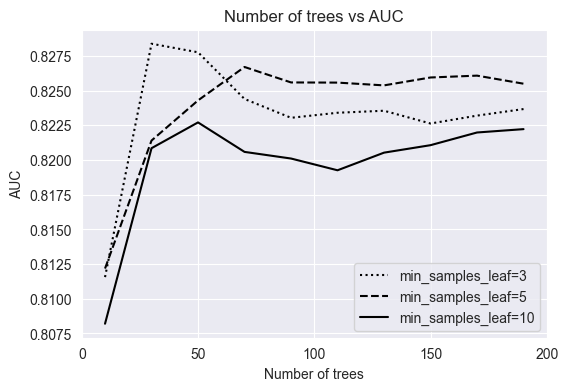

In [53]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

Обучаем финальную модель:

In [54]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=3)

In [55]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

np.float64(0.8253947591484828)

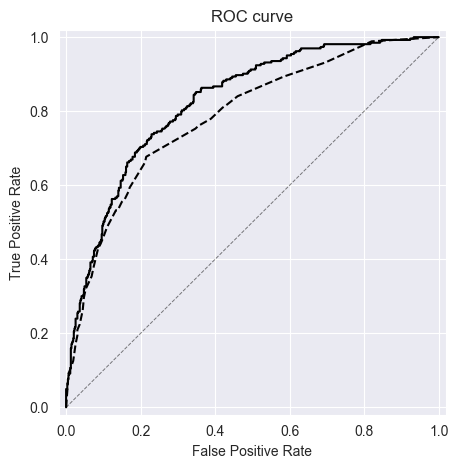

In [56]:
# Отрисовываем:

plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

# XGBoost (Градиентный бустинг)

Градиентный бустинг - способ обучения модели, который основан на исправлении/минимизации ошибки с каждой последующей итерацией

In [57]:
import xgboost as xgb

Сперва необходимо обернуть данные в специальную структуру DMatrix для эффективных разбиений

In [58]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [59]:
# Указываем небольшое множество параметров для обучения:

xgb_params = {
    'eta': 0.3, # размер шага итерации
    'max_depth': 6, # максимальная глубина каждого дерева
    'min_child_weight': 1, # Минимальная сумма весов всех наблюдений, необходимых в дочернем узле
    
    'objective': 'binary:logistic', # пределяет задачу обучения
    'nthread': 8, # Количество потоков, которые будут использоваться для выполнения задачи
    'seed' : 1 #  Начальное значение для генератора случайных чисел
}

In [60]:
# Обучаем модель

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [61]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.07751459, 0.07131889, 0.0675393 , 0.12096145, 0.05379206,
       0.06382526, 0.06665564, 0.4352498 , 0.41923273, 0.02550563],
      dtype=float32)

In [62]:
roc_auc_score(y_val, y_pred)

np.float64(0.8065256351262986)

## Мониторинг производительности модели

Чтобы получить представление о том, как меняется AUC по мере роста количества деревьев

In [63]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]

In [64]:
xgb_params = {
    'eta': 0.3, # размер шага итерации
    'max_depth': 6, # максимальная глубина каждого дерева
    'min_child_weight': 1, # Минимальная сумма весов всех наблюдений, необходимых в дочернем узле
    
    'objective': 'binary:logistic', # пределяет задачу обучения
    'eval_metric': 'auc', # Устанавливает метрику оценки в значение AUC
    'nthread': 8, # Количество потоков, которые будут использоваться для выполнения задачи
    'seed' : 1 #  Начальное значение для генератора случайных чисел
}

In [65]:
# Обучаем модель
# evals - список наблюдений
# verbose_eval - как часто выводить метрику

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.86730	eval-auc:0.77938
[10]	train-auc:0.95447	eval-auc:0.80851
[20]	train-auc:0.97464	eval-auc:0.81729
[30]	train-auc:0.98579	eval-auc:0.81543
[40]	train-auc:0.99421	eval-auc:0.80922
[50]	train-auc:0.99653	eval-auc:0.80918
[60]	train-auc:0.99817	eval-auc:0.81172
[70]	train-auc:0.99934	eval-auc:0.80870
[80]	train-auc:0.99979	eval-auc:0.80549
[90]	train-auc:0.99993	eval-auc:0.80409
[99]	train-auc:0.99999	eval-auc:0.80560


To capture this output, we can use:


- %%capture instruction that saves the result to 

- parse_xgb_output function that parses it

In [66]:
%%capture output 

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [67]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [68]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

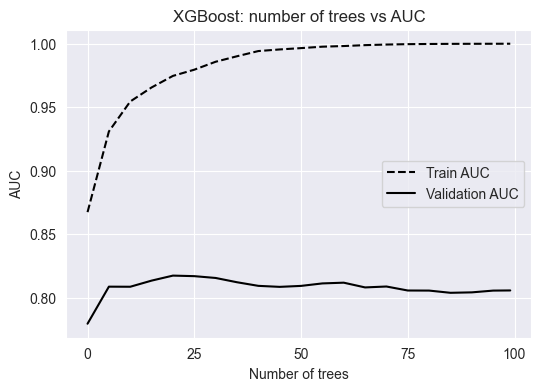

In [69]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

По мере увеличения количества деревьев увеличивается и оценка на обучающем наборе

## Parameter tuning: eta

In [70]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [71]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.81729
(0.81729, 20)


In [72]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [73]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.82781
(0.82781, 60)


In [74]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [75]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.82819
(0.82819, 110)


In [76]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [77]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.82635
(0.82635, 499)


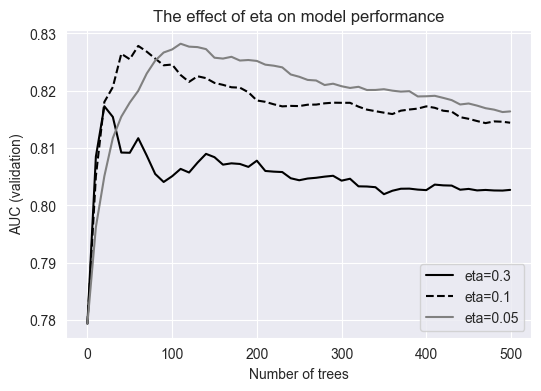

In [78]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

Модель требует большего количества деревьев, если параметр eta небольшой

## Parameter tuning: max_depth

начинаем с 3

In [79]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [80]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.8317
(0.8317, 110)


Переходим к 10

In [81]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [82]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.81729
(0.81458, 130)


Глубина 3 значительно лучше чем 10 и 6

In [83]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [84]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)
print(max(aucs_val_depth4))
print(max(zip(aucs_val_depth4, tree)))

0.82952
(0.82952, 90)


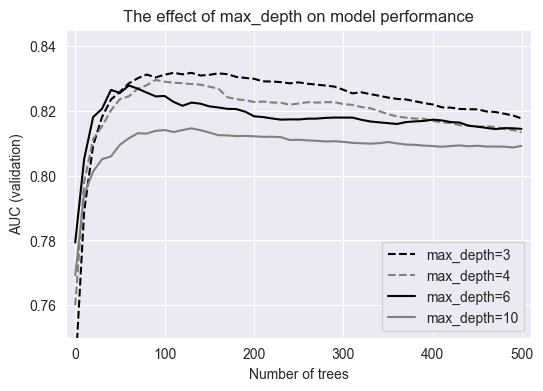

In [85]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth4, color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.75, 0.845)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

Оптимальное значение = 3

## Tune "min_child_weight"

In [86]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [87]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.8317
(0.8317, 110)


In [88]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [89]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.83515
(0.83515, 160)


In [90]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [91]:
tree, _, aucs_val_mcw30 = parse_xgb_output(output)
print(max(aucs_val_mcw30))
print(max(zip(aucs_val_mcw30, tree)))

0.83743
(0.83743, 160)


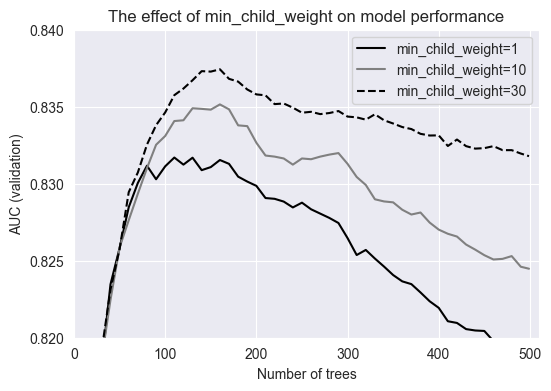

In [92]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw1, color='black', linestyle='solid', label='min_child_weight=1')
plt.plot(tree, aucs_val_mcw10, color='grey', linestyle='solid', label='min_child_weight=10')
plt.plot(tree, aucs_val_mcw30, color='black', linestyle='dashed', label='min_child_weight=30')

plt.ylim(0.82, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.82, 0.84, 5))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

# Checking the best number of trees

In [93]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [94]:
print(output)

[0]	train-auc:0.76455	eval-auc:0.73369
[10]	train-auc:0.84376	eval-auc:0.79435
[20]	train-auc:0.86049	eval-auc:0.81030
[30]	train-auc:0.87145	eval-auc:0.81905
[40]	train-auc:0.87690	eval-auc:0.82313
[50]	train-auc:0.88031	eval-auc:0.82576
[60]	train-auc:0.88345	eval-auc:0.82945
[70]	train-auc:0.88596	eval-auc:0.83073
[80]	train-auc:0.88832	eval-auc:0.83254
[90]	train-auc:0.89024	eval-auc:0.83380
[100]	train-auc:0.89204	eval-auc:0.83463
[110]	train-auc:0.89363	eval-auc:0.83575
[120]	train-auc:0.89519	eval-auc:0.83618
[130]	train-auc:0.89629	eval-auc:0.83672
[140]	train-auc:0.89760	eval-auc:0.83731
[150]	train-auc:0.89866	eval-auc:0.83728
[160]	train-auc:0.89970	eval-auc:0.83743
[170]	train-auc:0.90050	eval-auc:0.83681
[180]	train-auc:0.90142	eval-auc:0.83663
[190]	train-auc:0.90267	eval-auc:0.83612
[200]	train-auc:0.90405	eval-auc:0.83580
[210]	train-auc:0.90505	eval-auc:0.83574
[220]	train-auc:0.90591	eval-auc:0.83517
[230]	train-auc:0.90747	eval-auc:0.83521
[240]	train-auc:0.90840	eva

In [95]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.83743


In [96]:
max(zip(aucs_val, tree))

(0.83743, 160)

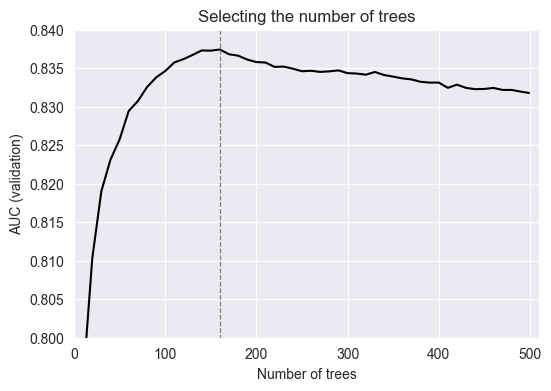

In [97]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.80, 0.84)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.80, 0.84, 9))


plt.vlines(160, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

# Final model

In [98]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=160, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.76455	eval-auc:0.73369
[10]	train-auc:0.84376	eval-auc:0.79435
[20]	train-auc:0.86049	eval-auc:0.81030
[30]	train-auc:0.87145	eval-auc:0.81905
[40]	train-auc:0.87690	eval-auc:0.82313
[50]	train-auc:0.88031	eval-auc:0.82576
[60]	train-auc:0.88345	eval-auc:0.82945
[70]	train-auc:0.88596	eval-auc:0.83073
[80]	train-auc:0.88832	eval-auc:0.83254
[90]	train-auc:0.89024	eval-auc:0.83380
[100]	train-auc:0.89204	eval-auc:0.83463
[110]	train-auc:0.89363	eval-auc:0.83575
[120]	train-auc:0.89519	eval-auc:0.83618
[130]	train-auc:0.89629	eval-auc:0.83672
[140]	train-auc:0.89760	eval-auc:0.83731
[150]	train-auc:0.89866	eval-auc:0.83728
[159]	train-auc:0.89960	eval-auc:0.83733


In [99]:
y_pred_xgb = model.predict(dval)

In [100]:
roc_auc_score(y_val, y_pred_xgb)

np.float64(0.8373344070136349)

In [101]:
print(roc_auc_score(y_val, y_pred_dt))
print(roc_auc_score(y_val, y_pred_rf))
print(roc_auc_score(y_val, y_pred_xgb))

0.7848562640769174
0.8253947591484828
0.8373344070136349


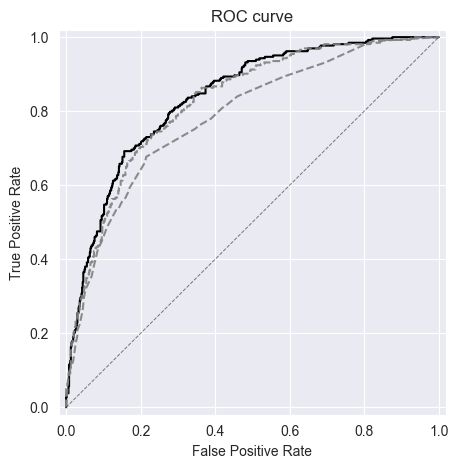

In [102]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='grey', linestyle='dashed', alpha=0.9)

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

# Final Test

In [103]:
y_train_full = (df_train_full.status == 'default').values
y_test = (df_test.status == 'default').values

del df_train_full['status']
del df_test['status']

In [104]:
dict_train_full = df_train_full.fillna(0).to_dict(orient='records')
dict_test = df_test.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

In [105]:
rf_final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=5, random_state=1)
rf_final.fit(X_train_full, y_train_full)

y_pred_rf = rf.predict_proba(X_test)[:, 1]

In [106]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

num_trees = 160

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

In [107]:
y_pred_xgb = xgb_final.predict(dtest)

In [108]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.821862323444602
0.8334758809442353


# Feature importance (Важность признаков)

- это техника, используемая для оценки значимости каждого признака (фичи) в модели. Важность признаков помогает понять, какие признаки оказывают наибольшее влияние на прогнозы модели и могут использоваться для:

In [109]:
dt.feature_importances_

array([0.01600051, 0.04793733, 0.12051523, 0.00833288, 0.0250906 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18724799, 0.00699145, 0.        ,
       0.        , 0.17292753, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0302163 ,
       0.        , 0.24421676, 0.12658146, 0.01394197])

In [110]:
list(zip(dv.feature_names_, dt.feature_importances_))

[('age', np.float64(0.016000509929902075)),
 ('amount', np.float64(0.047937333366648245)),
 ('assets', np.float64(0.12051522618539545)),
 ('debt', np.float64(0.008332876385504904)),
 ('expenses', np.float64(0.025090602575881332)),
 ('home=ignore', np.float64(0.0)),
 ('home=other', np.float64(0.0)),
 ('home=owner', np.float64(0.0)),
 ('home=parents', np.float64(0.0)),
 ('home=private', np.float64(0.0)),
 ('home=rent', np.float64(0.0)),
 ('home=unk', np.float64(0.0)),
 ('income', np.float64(0.187247989344766)),
 ('job=fixed', np.float64(0.006991445659436665)),
 ('job=freelance', np.float64(0.0)),
 ('job=others', np.float64(0.0)),
 ('job=partime', np.float64(0.17292752964348077)),
 ('job=unk', np.float64(0.0)),
 ('marital=divorced', np.float64(0.0)),
 ('marital=married', np.float64(0.0)),
 ('marital=separated', np.float64(0.0)),
 ('marital=single', np.float64(0.0)),
 ('marital=unk', np.float64(0.0)),
 ('marital=widow', np.float64(0.0)),
 ('price', np.float64(0.03021629841967651)),
 ('reco

In [111]:
importances = list(zip(dv.feature_names_, dt.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
26,records=yes,0.244217
12,income,0.187248
16,job=partime,0.172928
27,seniority,0.126581
2,assets,0.120515
1,amount,0.047937
24,price,0.030216
4,expenses,0.025091
0,age,0.016001
28,time,0.013942


In [112]:
df_importance = df_importance[df_importance.gain > 0]

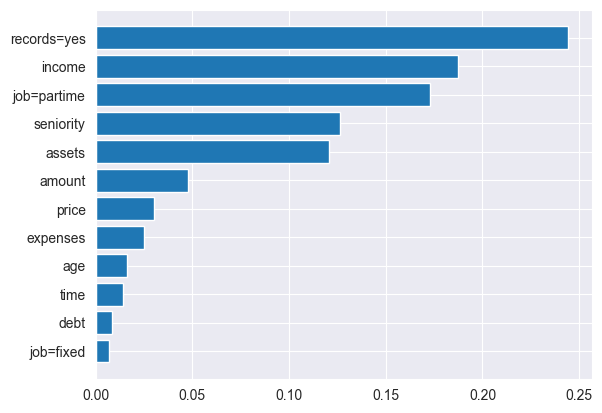

In [113]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

## Random Forest

In [114]:
rf.feature_importances_

array([5.80396975e-02, 8.05466579e-02, 7.48543955e-02, 1.30892389e-02,
       3.67221697e-02, 3.07676353e-05, 4.96748329e-03, 2.68604777e-02,
       8.62340997e-03, 2.42756565e-03, 1.51545597e-02, 0.00000000e+00,
       1.49148784e-01, 4.86780111e-02, 1.04372331e-02, 2.64702838e-03,
       5.42098995e-02, 0.00000000e+00, 1.50626638e-04, 7.15493302e-03,
       1.41350038e-03, 6.54893773e-03, 0.00000000e+00, 8.47670906e-05,
       6.60237016e-02, 8.22476921e-02, 8.97063347e-02, 1.30322920e-01,
       2.99092072e-02])

In [115]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

,feature,gain
12,income,0.149149
27,seniority,0.130323
26,records=yes,0.089706
25,records=no,0.082248
1,amount,0.080547
2,assets,0.074854
24,price,0.066024
0,age,0.058040
16,job=partime,0.054210
13,job=fixed,0.048678


In [116]:
df_importance = df_importance[df_importance.gain > 0.01]

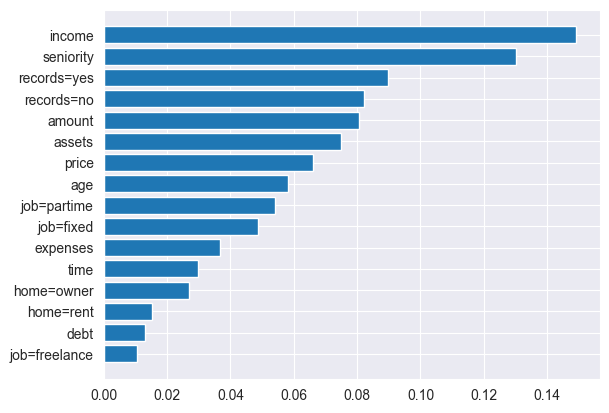

In [117]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

## XGBoost

In [118]:
scores = model.get_score(importance_type='gain')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('records=no', 25.251367568969727),
 ('job=partime', 22.555986404418945),
 ('seniority', 18.878623962402344),
 ('job=fixed', 17.076602935791016),
 ('income', 11.365492820739746),
 ('assets', 10.794251441955566),
 ('home=owner', 7.9633331298828125),
 ('amount', 7.078454971313477),
 ('home=rent', 6.774859428405762),
 ('price', 4.358323097229004),
 ('expenses', 4.0455803871154785),
 ('time', 3.8377017974853516),
 ('home=parents', 3.68530535697937),
 ('debt', 2.9746580123901367),
 ('job=freelance', 2.625304937362671),
 ('age', 2.3428452014923096),
 ('marital=married', 1.923622965812683)]

In [119]:
scores = model.get_score(importance_type='weight')
scores = sorted(scores.items(), key=lambda x: x[1])
list(reversed(scores))

[('price', 101.0),
 ('amount', 94.0),
 ('income', 92.0),
 ('seniority', 63.0),
 ('age', 61.0),
 ('assets', 55.0),
 ('records=no', 49.0),
 ('expenses', 46.0),
 ('debt', 25.0),
 ('time', 21.0),
 ('job=fixed', 19.0),
 ('job=partime', 18.0),
 ('home=parents', 18.0),
 ('marital=married', 12.0),
 ('home=owner', 11.0),
 ('home=rent', 4.0),
 ('job=freelance', 1.0)]

In [120]:
names = [n for (n, s) in scores]
scores = [s for (n, s) in scores]

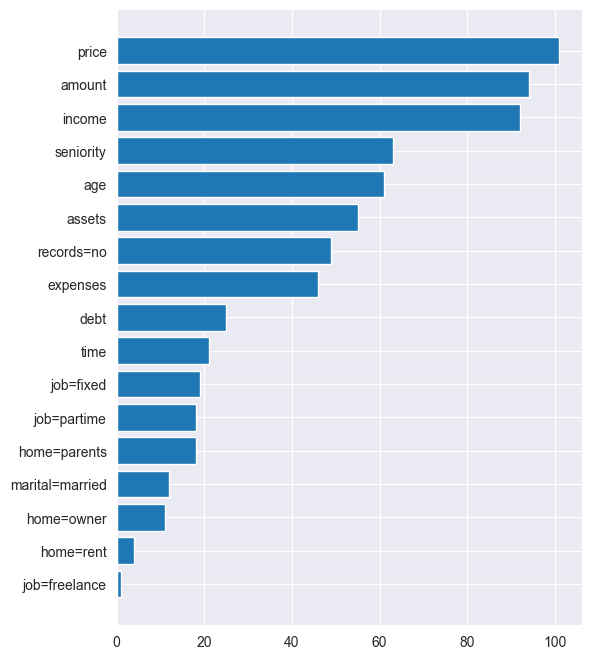

In [121]:
plt.figure(figsize=(6, 8))

plt.barh(np.arange(len(scores)), scores)
plt.yticks(np.arange(len(names)), names)

plt.show()

# Extremely randomized trees

Вместо поиска наилучшего возможного разделения условие разделения выбирается случайным образом.

 - Экстра-деревья быстрее обучаются и менее подвержены переобучению
 - Обеспечение адекватной производительности требует большего количества деревьев

In [122]:
from sklearn.ensemble import ExtraTreesClassifier

In [123]:
aucs = []

for i in range(10, 201, 10):
    rf = ExtraTreesClassifier(n_estimators=i, max_depth=30)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.768
20 -> 0.791
30 -> 0.785
40 -> 0.788
50 -> 0.793
60 -> 0.790
70 -> 0.795
80 -> 0.795
90 -> 0.791
100 -> 0.793
110 -> 0.794
120 -> 0.792
130 -> 0.800
140 -> 0.797
150 -> 0.795
160 -> 0.793
170 -> 0.800
180 -> 0.796
190 -> 0.791
200 -> 0.797
